<a href="https://colab.research.google.com/github/victorqueiroz23/analises_bioRxiv_database/blob/main/bioRxiv_json_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando as bibliotecas:
##### 1º) **Pandas**: manipulação e análise de dados
##### 2º) **json**: leitura e manipulação de arquivos JSON 
##### 3º) **requests**: extração de dados da web 
##### 4º) **matplotlib.pyplot**: visualização de dados



In [39]:
import pandas as pd
import json 
import requests as req
import matplotlib.pyplot as plt

### Formato do API no biorxiv:
##### [https://] api.biorxiv.org/details/biorxiv/**data_inicial**/**data_final**/ **cursor**
##### > Formato das datas = **YYYY-MM-DD**
##### > **cursor** = ponto de começo

In [40]:
resposta_req = req.get('https://api.biorxiv.org/details/biorxiv/2014-01-01/2022-03-27/00')

data_2014_atual_json = json.loads(resposta_req.text)


### Transformando arquivo JSON em Dataframe (biblioteca Pandas)!

In [42]:
data_2014_atual_df = pd.DataFrame(data_2014_atual_json['collection'])

# data_2014_atual_df.head(2)

data_2014_atual_df.columns

Index(['doi', 'title', 'authors', 'author_corresponding',
       'author_corresponding_institution', 'date', 'version', 'type',
       'license', 'category', 'jatsxml', 'abstract', 'published', 'server'],
      dtype='object')

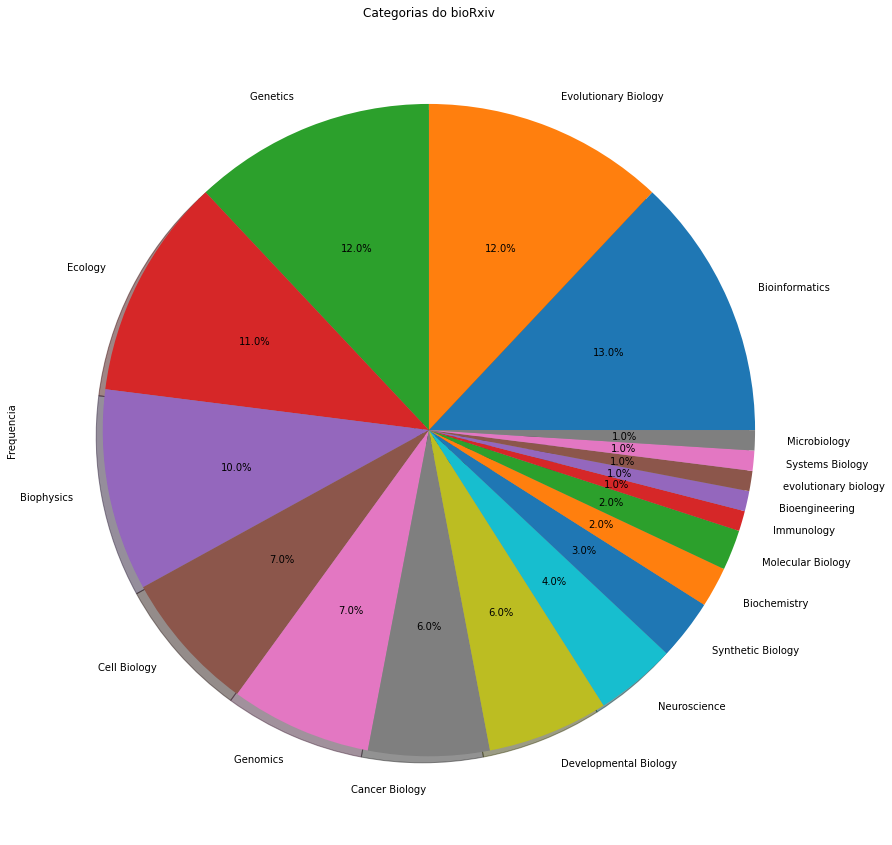

In [48]:
dict_histograma_categoria = dict(data_2014_atual_df.category.value_counts())

#lista = list(range(0, len(list(dict_histograma.keys()))))

df_histo = pd.Series(dict_histograma_categoria)

df_histo = pd.DataFrame(df_histo, columns = ['Frequencia'])

df_histo.plot.pie(y = 'Frequencia',
                  title = "Categorias do bioRxiv", 
                  legend = False,
                  autopct = '%1.1f%%',
                  shadow = True, 
                  startangle=0,
                  figsize = (15, 15))